In [2]:
# instalar as bibliotecas necessárias
!pip install pandas plotly geopandas matplotlib statsmodels scipy

In [3]:
# bibliotecas
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency, ttest_ind

In [4]:
# 1. importar a tabela de dados dos casos da Febre Amarela
df_febre_amarela = pd.read_csv('fa_casoshumanos.csv', sep=';', encoding='latin-1')

display(df_febre_amarela)

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2764,N,13,AM,130280.0,MARAÃ,M,12,14/02/2023,7.0,2.0,2023,2022/2023,NÃO,NaN
2764,2765,N,13,AM,130250.0,MANACAPURU,M,16,02/04/2023,14.0,4.0,2023,2022/2023,SIM,13/04/2023
2765,2766,SE,35,SP,355080.0,SÃO SEBASTIÃO DA GRAMA,M,44,18/02/2023,7.0,2.0,2023,2022/2023,NÃO,NaN
2766,2767,SE,35,SP,354910.0,SÃO JOÃO DA BOA VISTA,M,44,25/04/2023,17.0,4.0,2023,2022/2023,SIM,30/04/2023


In [5]:
# 2. apagar as colunas que não serão utilizadas para análise
df_febre_amarela = df_febre_amarela.drop(columns=['ID', 'COD_UF_LPI', 'COD_MUN_LPI', 'DT_IS', 'MONITORAMENTO_IS', 'MUN_LPI', 'SE_IS', 'MES_IS', 'ANO_IS', 'OBITO', 'DT_OBITO']).copy()

display(df_febre_amarela)

,MACRORREG_LPI,UF_LPI,SEXO,IDADE
0,N,RR,M,NaN
1,N,RR,M,19
2,NE,MA,M,32
3,NE,MA,M,33
4,N,PA,M,26
...,...,...,...,...
2763,N,AM,M,12
2764,N,AM,M,16
2765,SE,SP,M,44
2766,SE,SP,M,44


In [6]:
# 3. renomear as colunas que vão ser usadas para análise
df_febre_amarela.columns = ['REGIAO', 'UF', 'SEXO', 'IDADE']

display(df_febre_amarela)

,REGIAO,UF,SEXO,IDADE
0,N,RR,M,NaN
1,N,RR,M,19
2,NE,MA,M,32
3,NE,MA,M,33
4,N,PA,M,26
...,...,...,...,...
2763,N,AM,M,12
2764,N,AM,M,16
2765,SE,SP,M,44
2766,SE,SP,M,44


In [7]:
# 4. análise da coluna 'REGIAO'
counts = df_febre_amarela['REGIAO'].value_counts()
porcentagens = counts / counts.sum() * 100

# criação do histograma das Regiões
grafico = px.bar(x=porcentagens.index, y=porcentagens.values, text=porcentagens.values)
grafico.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
grafico.show()

In [9]:
# 5. análise da coluna 'UF'
counts = df_febre_amarela['UF'].value_counts()
porcentagens = counts / counts.sum() * 100

# criação do histograma dos UFs
grafico = px.bar(x=porcentagens.index, y=porcentagens.values, text=porcentagens.values)
grafico.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
grafico.show()

In [20]:
# 5.1 proporção dos casos de Febre Amarela por estado
contagem_estado = df_febre_amarela['UF'].value_counts()
proporcao_estado = contagem_estado / contagem_estado.sum()

print('Proporção dos casos por estado:\n')
print(proporcao_estado)

Proporção dos casos por estado:

UF
MG    0.396676
SP    0.249639
RJ    0.110910
ES    0.093208
GO    0.035405
PA    0.034682
AM    0.018064
SC    0.009754
MT    0.009754
TO    0.009032
RS    0.007587
RR    0.006503
PR    0.005058
MS    0.004335
DF    0.003613
BA    0.003613
MA    0.000723
AC    0.000723
RO    0.000723
Name: count, dtype: float64


In [27]:
# 5.2 teste qui-quadrado dos estados
observada = contagem_estado.values
num_estados = len(contagem_estado)

# Distribuição teórica uniforme (esperada)
esperada = [contagem_estado.sum() / num_estados] * num_estados

# Realização do teste de qui-quadrado
chi2, valor_p = chi2_contingency([observada, esperada])[:2]

print('Resultado do teste de qui-quadrado')
print(f'\nEstatística qui-quadrado: {chi2}')
print(f'Valor-p.................: {valor_p}')

Resultado do teste de qui-quadrado

Estatística qui-quadrado: 2558.846017941392
Valor-p.................: 0.0


In [41]:
# 5.3 Criação de uma Mapa de calor para visualizar os estados afetados

# Carregar o shapefile dos estados do Brasil
brasil_shapefile = 'BR_UF_2022.shp'
gdf_brasil = gpd.read_file(brasil_shapefile)

# Exibir as colunas para verificar o nome que será usada para criação do Mapa
display(gdf_brasil.columns)

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')

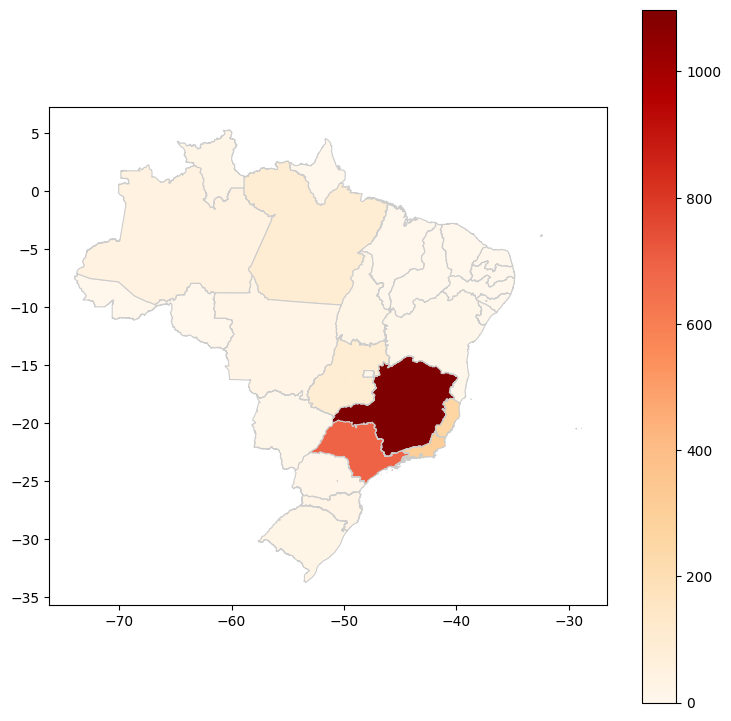

In [42]:
# Contagem de casos por estado
contagem_estado = df_febre_amarela['UF'].value_counts().reset_index()
contagem_estado.columns = ['UF', 'casos']

# Unir os dados de contagem de casos com os dados geoespaciais
gdf_brasil = gdf_brasil.merge(contagem_estado, left_on='SIGLA_UF', right_on='UF', how='left')

# Preencher estados sem casos com 0
gdf_brasil['casos'] = gdf_brasil['casos'].fillna(0)

# Criação do Mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

mapa_calor = gdf_brasil.plot(column='casos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

In [43]:
# 6. análise da coluna 'SEXO'
counts = df_febre_amarela['SEXO'].value_counts()
porcentagens = counts / counts.sum() * 100

# criação do histograma dos tipos de Sexo
grafico = px.bar(x=porcentagens.index, y=porcentagens.values, text=porcentagens.values)
grafico.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
grafico.show()

In [46]:
# 6.1 proporção de infectados (M e F)
total = len(df_febre_amarela)

masculino = (df_febre_amarela['SEXO'] == 'M').sum()
feminino  = (df_febre_amarela['SEXO'] == 'F').sum()

probalidade_masculino = masculino / total
probalidade_feminino = feminino / total

print(f'Sexo Masculino: {masculino}')
print(f'Sexo Feminino:  {feminino}')

print(f'\nProbalidade masculino: {probalidade_masculino}')
print(f'\robalidade feminino:  {probalidade_feminino}')

diferenca = probalidade_masculino / probalidade_feminino

print(f'\nDiferença: {diferenca}')

Sexo Masculino: 2291
Sexo Feminino:  476

Probalidade masculino: 0.8276734104046243
obalidade feminino:  0.17196531791907516

Diferença: 4.813025210084033


In [53]:
# 6.2 teste de proporção (M e F)

# Contagem de casos por sexo
contagem_sexo = df_febre_amarela['SEXO'].value_counts()

# número de casos de febre amarela em homens
casos_homens = contagem_sexo['M']

# número de casos de febre amarela em mulheres
casos_mulheres = contagem_sexo['F']

# número total de casos
total_casos = casos_homens + casos_mulheres

# número de casos em homens e mulheres
count = [casos_homens, casos_mulheres]

# teste de proporção
stat, p_value = proportions_ztest(count, total_casos)

print('Estatística do teste:', stat)
print('Valor-p:', p_value)

Estatística do teste: 48.796317409202864
Valor-p: 0.0


In [60]:
# 6.3 probalidade de um homem e uma mulher contrair a febre amarela nos estados MG e SP

# casos por sexo e região
contagem_sexo_uf = df_febre_amarela.groupby(['UF', 'SEXO']).size()

# total de casos por região
contagem_uf = df_febre_amarela['UF'].value_counts()

# probabilidade de um paciente ser do sexo masculino | feminino dado que ele está em SP
uf_sp = 'SP'
masc_sp = contagem_sexo_uf.loc[uf_sp, 'M'] / contagem_uf.loc[uf_sp]
femi_sp = contagem_sexo_uf.loc[uf_sp, 'F'] / contagem_uf.loc[uf_sp]

# probabilidade de um paciente ser do sexo masculino | feminino dado que ele está em MG
uf_mg = 'MG'
masc_mg = contagem_sexo_uf.loc[uf_mg, 'M'] / contagem_uf.loc[uf_mg]
femi_mg = contagem_sexo_uf.loc[uf_mg, 'F'] / contagem_uf.loc[uf_mg]

print('Estado MG:')
print(f'HOMEM contrair.: {masc_mg}')
print(f'MULHER contrair: {femi_mg}')

print('\nEstado SP:')
print(f'HOMEM contrair.: {masc_sp}')
print(f'MULHER contrair: {femi_sp}')

Estado MG:
HOMEM contrair.: 0.848816029143898
MULHER contrair: 0.15027322404371585

Estado SP:
HOMEM contrair.: 0.8234442836468886
MULHER contrair: 0.17655571635311143


In [63]:
# 7. análise da coluna 'IDADE'
counts = df_febre_amarela['IDADE'].value_counts()

# criação do histograma das faixas de Idades
grafico = px.bar(x=counts.index, y=counts.values, text=counts.values)
grafico.update_traces(texttemplate='%{text:.2f}', textposition='outside')
grafico.show()

In [64]:
# 7.1 calcular frequência, frequência relativa e probalidadde das 'IDADES' mais afetadas
total = len(df_febre_amarela)
idades = ((df_febre_amarela['IDADE'] >= '38') & (df_febre_amarela['IDADE'] <= '45')).sum()

# frequência e frequência relativa
frequencia_idade = df_febre_amarela['IDADE'].value_counts()
frequencia_relativa_idade = df_febre_amarela['IDADE'].value_counts(normalize=True)

print(f'Frequência:\n {frequencia_idade.head(5)}')
print(f'\nFrequência Relativa:\n {frequencia_relativa_idade.head(5)}')

# probabilidade
probalidade = idades / total

print(f'\nProbabilidade: {probalidade}')

Frequência:
 IDADE
38    72
41    72
47    69
46    69
45    67
Name: count, dtype: int64

Frequência Relativa:
 IDADE
38    0.026030
41    0.026030
47    0.024946
46    0.024946
45    0.024223
Name: proportion, dtype: float64

Probabilidade: 0.18641618497109827


In [65]:
# 7.2 formatar os valores da coluna 'IDADE'

# substituir vírgulas por pontos na coluna 'IDADE'
df_febre_amarela['IDADE'] = df_febre_amarela['IDADE'].str.replace(',', '.')

# converter valores para float
df_febre_amarela['IDADE'] = df_febre_amarela['IDADE'].astype(float)

In [68]:
# 7.3 calcular a média e a mediana da coluna 'IDADE'
media_idade   = df_febre_amarela['IDADE'].mean()
mediana_idade = df_febre_amarela['IDADE'].median()

print(f'Média da Idade..: {media_idade}')
print(f'Mediana da Idade: {mediana_idade}')

Média da Idade..: 42.57029872192371
Mediana da Idade: 43.0


In [75]:
# 7.4 teste de média (SEXO E IDADE)

# filtrar os dados para obter apenas os homens e as mulheres
dados_homens = df_febre_amarela[df_febre_amarela['SEXO'] == 'M']['IDADE']
dados_mulheres = df_febre_amarela[df_febre_amarela['SEXO'] == 'F']['IDADE']

# remover valores ausentes (NaN)
dados_homens = dados_homens.dropna()
dados_mulheres = dados_mulheres.dropna()

# aplicar o teste t para comparar as médias de idade
estatistica_t, valor_p = ttest_ind(dados_homens, dados_mulheres)

print(f'Estatística do teste t: {estatistica_t}')
print(f'Valor-p:..............: {valor_p}')

Estatística do teste t: 1.0022340410167385
Valor-p:..............: 0.31631830156263996


In [78]:
# 7.5 probabilidade de diferentes faixas estárias (criança, jovem e adulto) contrair a febre amarela no SE e no N

# dividir a base de dados em crianças, jovens e adultos
criancas = df_febre_amarela[df_febre_amarela['IDADE'] <= 14]
jovens = df_febre_amarela[(df_febre_amarela['IDADE'] >= 15) & (df_febre_amarela['IDADE'] <= 24)]
adultos = df_febre_amarela[df_febre_amarela['IDADE'] >= 25]

# filtrar os indivíduos na região SE e N
pacientes_SE = df_febre_amarela[(df_febre_amarela['REGIAO'] == 'SE')]
pacientes_N = df_febre_amarela[(df_febre_amarela['REGIAO'] == 'N')]

# calcular a probabilidade para crianças
total_criancas = len(criancas)
total_pacientes_SE_criancas = len(criancas[criancas['REGIAO'] == 'SE'])
total_pacientes_N_criancas = len(criancas[criancas['REGIAO'] == 'N'])

probabilidade_SE_criancas = total_pacientes_SE_criancas / total_criancas
probabilidade_N_criancas = total_pacientes_N_criancas / total_criancas

# calcular a probabilidade para jovens
total_jovens = len(jovens)
total_pacientes_SE_jovens = len(jovens[jovens['REGIAO'] == 'SE'])
total_pacientes_N_jovens = len(jovens[jovens['REGIAO'] == 'N'])

probabilidade_SE_jovens = total_pacientes_SE_jovens / total_jovens
probabilidade_N_jovens = total_pacientes_N_jovens / total_jovens

# calcular a probabilidade para adultos
total_adultos = len(adultos)
total_pacientes_SE_adultos = len(adultos[adultos['REGIAO'] == 'SE'])
total_pacientes_N_adultos = len(adultos[adultos['REGIAO'] == 'N'])

probabilidade_SE_adultos = total_pacientes_SE_adultos / total_adultos
probabilidade_N_adultos = total_pacientes_N_adultos / total_adultos

print('CRIANÇAS:')
print(f'crianças contrair febre amarela na região SE: {probabilidade_SE_criancas}')
print(f'crianças contrair febre amarela na região N.: {probabilidade_N_criancas}')

print('\nJOVENS:')
print(f'jovens contrair febre amarela na região SE: {probabilidade_SE_jovens}')
print(f'jovens contrair febre amarela na região N.: {probabilidade_N_jovens}')

print('\nADULTOS:')
print(f'adultos contrair febre amarela na região SE: {probabilidade_SE_adultos}')
print(f'adultos contrair febre amarela na região N.: {probabilidade_N_adultos}')

CRIANÇAS:
crianças contrair febre amarela na região SE: 0.5185185185185185
crianças contrair febre amarela na região N.: 0.3425925925925926

JOVENS:
jovens contrair febre amarela na região SE: 0.6619318181818182
jovens contrair febre amarela na região N.: 0.22443181818181818

ADULTOS:
adultos contrair febre amarela na região SE: 0.8950563746747615
adultos contrair febre amarela na região N.: 0.03295750216825672


In [79]:
# 7.6 box plot 'IDADE'
boxplot = px.box(df_febre_amarela['IDADE'], width=800, height=400)
boxplot.show()

In [80]:
# converter valores da coluna 'IDADE' para float
df_febre_amarela['IDADE'] = pd.to_numeric(df_febre_amarela['IDADE'], errors='coerce')

# calcular os quartos
quarto_inferior = df_febre_amarela['IDADE'].quantile(0.25)
quarto_superior = df_febre_amarela['IDADE'].quantile(0.75)

# calcular a dispersão entre os quartos
fs = quarto_superior - quarto_inferior

print(f'Quarto inferior (Q1)......: {quarto_inferior}')
print(f'Quarto superior (Q3)......: {quarto_superior}')
print(f'Dispersão entre os quartos: {fs}')

# verificar se possui outliers
outlier_menor = quarto_inferior - (1.5 * fs)
outlier_maior = quarto_superior + (1.5 * fs)

print(f'\nOutlier menor: {outlier_menor}')
print(f'Outlier maior: {outlier_maior}')

Quarto inferior (Q1)......: 30.0
Quarto superior (Q3)......: 55.0
Dispersão entre os quartos: 25.0

Outlier menor: -7.5
Outlier maior: 92.5


In [81]:
# variancia amostral da coluna 'IDADE'
variancia_amostral = df_febre_amarela['IDADE'].var()

# desvio padrão da coluna 'IDADE'
desvio_amostral = df_febre_amarela['IDADE'].std()

print(f'Variância amostral: {variancia_amostral:.0f}')
print(f'Desvio Padrão.....: {desvio_amostral:.0f}')

Variância amostral: 276
Desvio Padrão.....: 17
